## Model of the Sugar Factory Experiment

In [1]:
from model import Model
from chunk import Chunk
import numpy as np
import matplotlib.pyplot as plt

First we define a function that determines the output of the factory

In [2]:
def factory_output(w, prod):
    new_production = 2 * w - prod + np.random.randint(-1,1)
    if new_production > 12:
        new_production = 12
    elif new_production < 1:
        new_production = 1
    return new_production

Target production is 9

In [3]:
target = 9

If the model fails to retrieve an experience, we need a backup default strategy. Here we just pick a random number of workers. Alternatively, we can try different default strategies

In [4]:
def default_strategy(production, target):
    return np.random.randint(1,10)

Run the model for a single day. It tries to retrieve an example from declarative memory. If this is successful, it follows the example. Otherwise it will carry out the default strategy. It then calculates the new production, and stores this as a chunk in memory.

In [5]:
def do_one_day(m, day, production):
    query = Chunk(name = "query", slots = {"yesterday": production, 
                                         "today": target})
    chunk, latency = m.retrieve_partial(query)
    if chunk == None:
        workers = default_strategy(production, target)
    else:
        workers = chunk.slots["workers"]
        m.add_encounter(chunk)
    m.time += latency
    new_production = factory_output(workers, production)
    new_chunk = Chunk(name = "experience" + str(day),
                     slots = {"yesterday" : production,
                             "workers" : workers,
                             "today": new_production})
    m.add_encounter(new_chunk)
    m.time += 5.0
    return day + 1, new_production

Run a single subject for 80 trials, and return the accuracies.

In [6]:
def run_subject():
    day = 1
    production = 5
    m = Model()
    m.rt = -2.0
    results = []
    for i in range(80):
        day, production = do_one_day(m, day, production)
        if production >= 8 and production <= 10:
            results.append(1)
        else:
            results.append(0)
    return results

Run the experiment for n subjects, and plot the results

In [7]:
def run_experiment(n):
    totals = []
    for i in range(n):
        result = run_subject()
        if totals == []:
            totals = result
        else:
            totals = [x + y for x,y in zip(totals, result)]
    totals = [ x /n for x in totals]
    plt.plot(range(80), totals)

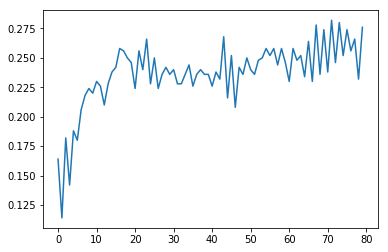

In [9]:
run_experiment(500)